# Unit Tests for the ancIBD pip package
Run these before uploading a new version of package on pip. To ensure everything works as intented.

In [1]:
import sys as sys
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import os as os
import pickle

### The following code gives nice and clean Arial font on your plots
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
rcParams['font.sans-serif'] = ['Arial']

### The following Code sets the working directory to your ancIBD code
# If using system ancIBD installation comment out (useful to test pip insalled package):
# sys.path.insert(0,"/n/groups/reich/hringbauer/git/hapBLOCK/package/")  # hack to get development package first in path

## 0) Test key imports of ancIBD
Also required for runs below

In [2]:
from ancIBD.IO.prepare_h5 import vcf_to_1240K_hdf
from ancIBD.run import hapBLOCK_chroms, hapBLOCK_chrom, hapBLOCK_chroms_mixedPloidy
from ancIBD.run import run_plot_pair, run_plot_pair_IBD2, run_plot_pair_X
from ancIBD.plot.plot_karyotype import plot_karyo_from_ibd_df
from ancIBD.plot.plot_karyotype import plot_pde_individual_from_ibd_df

# A) Preparing an HDF5 from HDF5
Test whether creating the data works

In [ ]:
%%time
ch = 5

base_path = f"/n/groups/reich/hringbauer/git/hapBLOCK/"
vcf_to_1240K_hdf(in_vcf_path = base_path + f"notebook/vignette/data/vcf.raw/example_hazelton_chr{ch}.vcf.gz",
                 path_vcf = base_path + f"output/dumpster/unittests/example_hazelton_chr{ch}.vcf",
                 path_h5 =  base_path + f"output/dumpster/unittests/example_hazelton_chr{ch}.h5",
                 marker_path = base_path + f"notebook/vignette/data/filters/snps_bcftools_ch{ch}.csv",
                 map_path = base_path + f"notebook/vignette/data/map/v51.1_1240k.snp", 
                 af_path = base_path + f"notebook/vignette/data/afs/v51.1_1240k_AF_ch{ch}.tsv",
                 col_sample_af = "", 
                 buffer_size=20000, chunk_width=8, chunk_length=20000,
                 ch=ch)

print(f"Finished running chromosome {ch}")

Print downsampling to 1240K...
Running bash command: 
bcftools view -Ov -o /n/groups/reich/hringbauer/git/hapBLOCK/output/dumpster/unittests/example_hazelton_chr5.vcf -T /n/groups/reich/hringbauer/git/hapBLOCK/notebook/vignette/data/filters/snps_bcftools_ch5.csv -M2 -v snps /n/groups/reich/hringbauer/git/hapBLOCK/notebook/vignette/data/vcf.raw/example_hazelton_chr5.vcf.gz
Finished BCF tools filtering to target markers.
Deleting previous HDF5 file at path_h5: /n/groups/reich/hringbauer/git/hapBLOCK/output/dumpster/unittests/example_hazelton_chr5.h5...
Converting to HDF5...


# B) Running ancIBD
Test whether running on the data works and calls correct IBD

In [ ]:
%%time
df_ibd = hapBLOCK_chroms(folder_in='/n/groups/reich/hringbauer/git/hapBLOCK/output/dumpster/unittests/example_hazelton_chr',
                         iids=["I12439", "I12440"], run_iids=[],
                         ch=5, folder_out='',
                         output=False, prefix_out='', logfile=False,
                         l_model='h5', e_model='haploid_gl', h_model='FiveStateScaled', t_model='standard',
                         ibd_in=1, ibd_out=10, ibd_jump=400,
                         min_cm=6, cutoff_post=0.99, max_gap=0.0075)

m = np.max(df_ibd["lengthM"])
assert(np.isclose(m, 0.25763, atol=0.01))
print("Test Successful.")

# C) Plotting the data
Test whether the plotting functions work

## C1) Running and plotting IBD between two chromosomes

In [ ]:
%%time
iids = ["I12439", "I12440"]	

run_plot_pair(iids=iids, ch=5, plot=True, xlim=[],
              path_h5 = "/n/groups/reich/hringbauer/git/hapBLOCK/data/hdf5/1240k_v51.1/ch" ,
              min_cm=6, p_col='variants/AF_ALL', ms=1.5, fs_l=16, figsize=(10,3),
              path_fig="/n/groups/reich/hringbauer/git/hapBLOCK/figs/dumpster/unittests/karyo.png")
print("Test Successful.")

### C2) Karyotype Plot with IBD segments

In [ ]:
path_ibd = "/n/groups/reich/hringbauer/git/ibd_euro/output/ibd/ibd220.ibd.v51.1.tsv"
df_ibd = pd.read_csv(path_ibd, sep="\t")

plot_karyo_from_ibd_df(df_ibd, iids=["I12439", "I12440"], min_cm=8, 
                       savepath="/n/groups/reich/hringbauer/git/hapBLOCK/figs/dumpster/unittests/karyo.png",
                       title = "I12439 - I12440")
print("Test Successful.")

### C3: Histogram of IBD lengths for one pair

In [ ]:
path_ibd = "/n/groups/reich/hringbauer/git/ibd_euro/output/ibd/ibd220.ibd.v51.1.tsv"
df_ibd = pd.read_csv(path_ibd, sep="\t")

plot_pde_individual_from_ibd_df(df_ibd, iids=["I11752", "SHT002"],
                                savepath="/n/groups/reich/hringbauer/git/hapBLOCK/figs/dumpster/unittests/ibd_histo.png", 
                                title="I11752 - SHT002", comm_ancs=[4, 4, 2, 2], ms=[4, 6, 5, 4],
                                labels=['First Cousins', 'Second Cousins', '5 generations anc.', '4 generations anc.'],)
print("Test Successful.")

# D) Test bash functionality of ancIBD

### D1) Run ancIBD from VCF file
Test run on chromosome 20. Converts vcf to ancIBD hdf5, and then runs ancIBD.

In [ ]:
!ancIBD-run -h
print("Test Successful.")

In [ ]:
%%time

ch = 3
base_path = f"/n/groups/reich/hringbauer/git/hapBLOCK/"
path_vcf = base_path + f"notebook/vignette/data/vcf.raw/example_hazelton_chr{ch}.vcf.gz"
marker_path = base_path + f"notebook/vignette/data/filters/snps_bcftools_ch{ch}.csv"
map_path = base_path + f"notebook/vignette/data/map/v51.1_1240k.snp"
af_path = base_path + f"notebook/vignette/data/afs/v51.1_1240k_AF_ch{ch}.tsv"
out_path = base_path + f"output/dumpster/unittests/bash"

!ancIBD-run --vcf $path_vcf --ch $ch --out $out_path --marker_path $marker_path --map_path $map_path --af_path $af_path --prefix example_hazelton

### Check output
df_ibd = pd.read_csv(os.path.join(out_path, f"example_hazelton.ch{ch}.tsv"), sep="\t")
idx = (df_ibd["iid1"] == "I12440") & (df_ibd["iid2"] == "I12438")
m = np.max(df_ibd["lengthM"][idx])
assert(np.isclose(m, 0.658, atol=0.01))
print("Test Successful.")

### D2) Run from H5
Run ancIBD via bash directly from H5

In [ ]:
%%time

base_path = f"/n/groups/reich/hringbauer/git/hapBLOCK/"
path_h5 = base_path + "output/dumpster/unittests/bash/example_hazelton.ch20.h5"
marker_path = base_path + "notebook/vignette/data/filters/snps_bcftools_ch20.csv"
map_path = base_path + "notebook/vignette/data/map/v51.1_1240k.snp"
af_path = base_path + "notebook/vignette/data/afs/v51.1_1240k_AF_ch20.tsv"
out_path = base_path + f"output/dumpster/unittests/bash"

!ancIBD-run --h5 $path_h5 --ch 20 --out $out_path --marker_path $marker_path --map_path $map_path --af_path $af_path --prefix example_hazelton1
print("Test Successful.")

## E) ancIBD2
Running ancIBD with mode to also detect IBD2 (i.e. two haplotypes in IBD)

### E1) Run and Visualize ancIBD2

Filtering to 0.99 GP variants: 0.902x
Filtering to 0.99 GP variants: 0.916x
Filtering to common GP variants: 0.853x


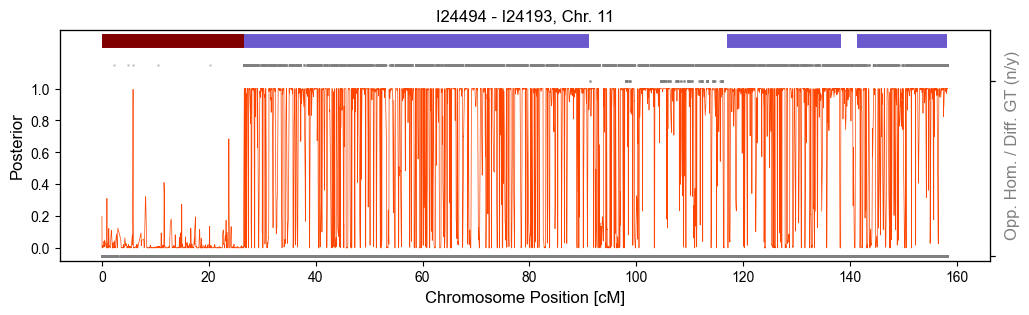

In [11]:
run_plot_pair_IBD2(path_h5="/n/groups/reich/hringbauer/git/hapBLOCK/data/hdf5/1240k_v51.1/ch",
                  iids = ["I24494", "I24193"], ch=11, xlim=[], plot=True)
print("Test Successful.")

### E2) Run IBD on X 

In [12]:
%%time

df_ibd, _, _ = hapBLOCK_chrom(folder_in="/n/groups/reich/hringbauer/git/hapBLOCK/data/hdf5/1240k_v51.1/ch",
                         iids=["I24494", "I24193"], ch=11, folder_out='',
                         output=False, prefix_out='', logfile=False, 
                         l_model='h5', h_model='FiveStateScaled', IBD2=True)

df_ibd2 = df_ibd[df_ibd["segment_type"]=="IBD2"]


m = np.max(df_ibd2["lengthM"])
assert(np.isclose(m, 0.265, atol=0.01))
print("Test Successful.")

Test Successful.
CPU times: user 555 ms, sys: 18.5 ms, total: 574 ms
Wall time: 629 ms


## F) IBDX
Running IBD on the X Chromosome

### F1) Run IBD X

In [13]:
df_ibd = hapBLOCK_chroms_mixedPloidy(
    folder_in="/n/groups/reich/hringbauer/git/hapBLOCK/data/hdf5/ancIBDX/Gurgy_quintet.ch",
    iids=['GRG029', 'GRG036'], ploidy=(1, 1), ch='X',
    output=True, logfile=False, p_col='variants/RAF',
    ibd_in=1, ibd_out=10, ibd_jump=400,
    min_cm=2, cutoff_post=0.99, max_gap=0.0075, mask='')

m = np.max(df_ibd["lengthM"])
assert(np.isclose(m, 0.78, atol=0.01))
print("Test Successful.")

Thresholding GP at 0.999
Filtering to 46587/46587 SNPs with GP data (on target iids)
Minimum Genetic Map: 0.2574 Morgan
Maximum Genetic Map: 2.0170 Morgan
Gaps bigger than 0.1 cM: 208
Maximum Gap: 0.9164 cM
Upper Gap Cutoff: 5.0000 cM
Memory Usage at end of HMM:
Memory Usage: 418.766848 mB
Fraction Markers above IBD cutoff: 0.7729
Merged n=1 gaps < 0.0075 M
Called n=3 IBD Blocks > 2 cM
Longest Block: 77.93 cM
Test Successful.


### F2) Plot IBD X
Test running and plotting various Ploidies (male and female combinations)

Thresholding GP at 0.999
Filtering to 46587/46587 SNPs with GP data (on target iids)
Plotting 46587 markers
# of oppo homos: 2595


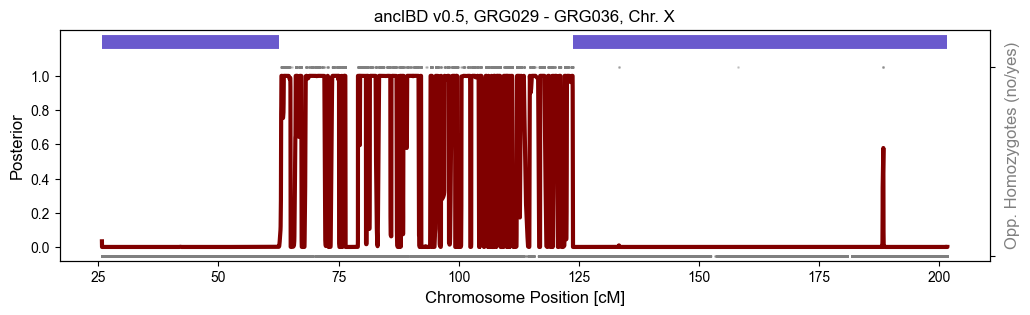

CPU times: user 456 ms, sys: 11.9 ms, total: 468 ms
Wall time: 543 ms


In [14]:
%%time
run_plot_pair_X(folder_in="/n/groups/reich/hringbauer/git/hapBLOCK/data/hdf5/ancIBDX/Gurgy_quintet.ch",
                iids = ['GRG029', 'GRG036'], ploidy=(1, 1),
                xlim=[], p_col="variants/RAF", plot=True, min_cm=8)
print("Test Successful.")

Thresholding GP at 0.999
Filtering to 46587/46587 SNPs with GP data (on target iids)
Plotting 46587 markers
# of oppo homos: 8


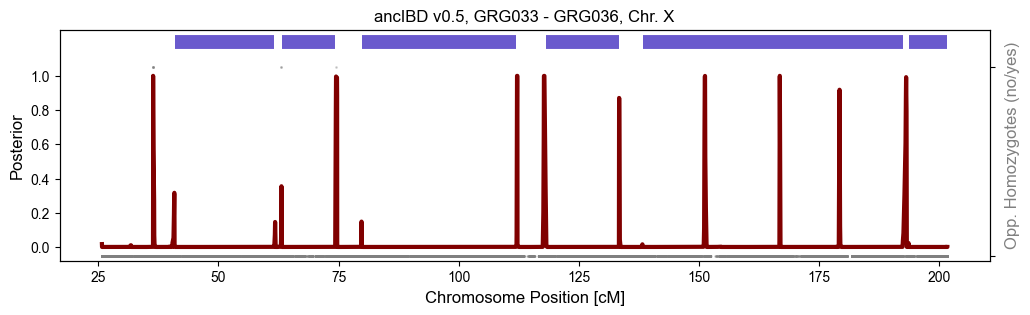

In [15]:
run_plot_pair_X(folder_in="/n/groups/reich/hringbauer/git/hapBLOCK/data/hdf5/ancIBDX/Gurgy_quintet.ch",
                iids = ['GRG033', 'GRG036'], ploidy=(2, 1),
                xlim=[], p_col="variants/RAF", plot=True, min_cm=8)
print("Test Successful.")

## F3) Test ancIBDX bash intallation

In [16]:
!ancIBDX -h
print("Test Successful.")

usage: ancIBDX [-h] [--vcf VCF] [--h5 H5] [--ch CH]
               [--marker_path MARKER_PATH] [--map_path MAP_PATH]
               [--af_path AF_PATH] [--af_column AF_COLUMN] [--out OUT]
               [--prefix PREFIX] [--ibd-in IBD_IN] [--ibd-out IBD_OUT]
               [--ibd-jump IBD_JUMP] [--min MIN] --ploidy PLOIDY [--pair PAIR]
               [--mask MASK] [--bin BIN] [--snpcm SNPCM] [-v]

Run ancIBD (on Autosomes).

optional arguments:
  -h, --help            show this help message and exit
  --vcf VCF             path to the imputed vcf file
  --h5 H5               path to hdf5 file. If specified, ancIBD will skip the
                        vcf to hdf5 conversion step. Only one of --vcf and
                        --h5 should be specified. But please make sure that
                        the hdf5 file has suffix ch{chromosome number}.h5
                        (e.g, test.ch20.h5).
  --ch CH               chromosome name, default by X.
  --marker_path MARKER_PATH
           

# G) Run ancIBD in Dictionary Mode
Needs example data created in `./prep_testdata/prep_dictionary_data.ipynb`

### G1) Run Python IBD Detection

In [17]:
%%time
### Load the data
load_path = "/n/groups/reich/hringbauer/git/hapBLOCK/output/dumpster/unittests/dict_I12439-I12440_chr5.pickle"
with open(load_path, 'rb') as handle:
    p = pickle.load(handle)

### Run ancIBD in `l_model=dict`
df_ibd = hapBLOCK_chroms(folder_in=p, iids=["I12439", "I12440"],
                             ch=5, folder_out='',
                             output=False, prefix_out='', logfile=False,
                             l_model='dict', e_model='haploid_gl2', h_model='FiveStateScaled', 
                             t_model='standard', p_col='calldata/AF',
                             ibd_in=1, ibd_out=10, ibd_jump=400,
                             min_cm=8, cutoff_post=0.99, max_gap=0.0075)

m = np.max(df_ibd["lengthM"])
print(f"Found {len(df_ibd)} IBD segments.\nMax Length: {m:.6f} M")
assert(np.isclose(m, 0.25763, atol=0.01))
print("Test Successful.")

Found 2 IBD segments.
Max Length: 0.257627 M
Test Successful.
CPU times: user 122 ms, sys: 16.9 ms, total: 139 ms
Wall time: 135 ms


### G2) Visualize IBD sharing from dictionary Input

Filtering to 0.99 GP variants: 0.954x
Filtering to 0.99 GP variants: 0.848x
Filtering to common GP variants: 0.827x
Plotting 69063 markers
Saved to /n/groups/reich/hringbauer/git/hapBLOCK/figs/dumpster/unittests/karyo.png


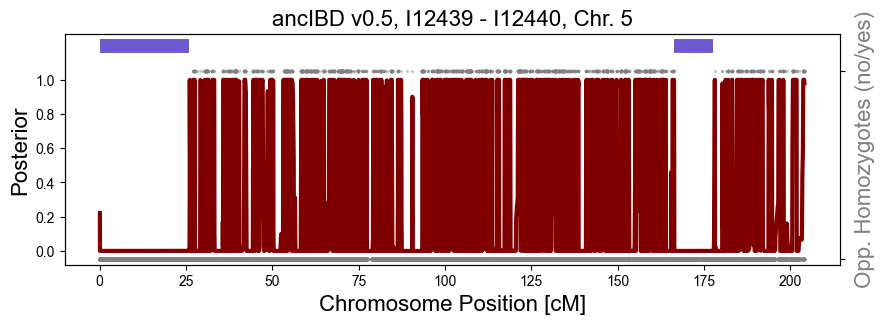

Test Successful.
CPU times: user 1.21 s, sys: 39 ms, total: 1.25 s
Wall time: 1.27 s


In [18]:
%%time
iids = ["I12439", "I12440"]	

run_plot_pair(iids=iids, ch=5, plot=True, xlim=[],
              path_h5 = p,
              min_cm=6, p_col='calldata/AF', ms=1.5, fs_l=16, figsize=(10,3), l_model='dict',
              path_fig="/n/groups/reich/hringbauer/git/hapBLOCK/figs/dumpster/unittests/karyo.png")
print("Test Successful.")